In [1]:
# Major libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

In [2]:
# LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Cross valid labrary
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score,recall_score, roc_auc_score, roc_curve
# KNN
from sklearn.neighbors import KNeighborsClassifier
# XG Boost
import xgboost as xgb

In [3]:
# Gridsearch
from sklearn.model_selection import GridSearchCV
# KFold & Cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# RandomForest
from sklearn.ensemble import RandomForestClassifier
# SVM
from sklearn.svm import SVC
# NB
from sklearn.naive_bayes import GaussianNB
# LightGBM
from lightgbm import LGBMClassifier
import lightgbm as lgb
# Other library
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import warnings

In [4]:
data = pd.read_csv("Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.shape

(10000, 14)

In [7]:
# Drop the columns that we don't need.
data = data.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [9]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [11]:
print(pd.unique(data["Geography"]))
print(pd.unique(data["Gender"]))

['France' 'Spain' 'Germany']
['Female' 'Male']


In [12]:
# Analizing of target
data["Exited"].value_counts()
churn = data.loc[data["Exited"]== 1]
not_churn = data.loc[data["Exited"]== 0]

## hist charts

# CreditScore

In [13]:
not_churn["CreditScore"].describe()

count    7963.000000
mean      651.853196
std        95.653837
min       405.000000
25%       585.000000
50%       653.000000
75%       718.000000
max       850.000000
Name: CreditScore, dtype: float64

In [14]:
churn["CreditScore"].describe()

count    2037.000000
mean      645.351497
std       100.321503
min       350.000000
25%       578.000000
50%       646.000000
75%       716.000000
max       850.000000
Name: CreditScore, dtype: float64

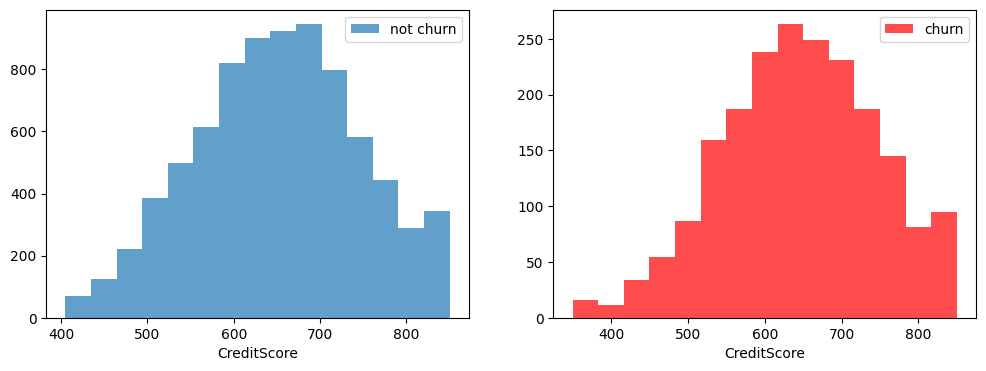

In [15]:
pyplot.figure(figsize=(12,4))

pyplot.subplot(1,2,1)
pyplot.xlabel("CreditScore")
pyplot.hist(not_churn["CreditScore"],bins=15,alpha=0.7, label="not churn")
pyplot.legend(loc="upper right")

pyplot.subplot(1,2,2)
pyplot.xlabel("CreditScore")
pyplot.hist(churn["CreditScore"],bins=15,alpha=0.7, label="churn", color="red")
pyplot.legend(loc="upper right")

pyplot.show()

# Geography

In [16]:
not_churn["Geography"].describe()

count       7963
unique         3
top       France
freq        4204
Name: Geography, dtype: object

In [17]:
churn["Geography"].describe()

count        2037
unique          3
top       Germany
freq          814
Name: Geography, dtype: object

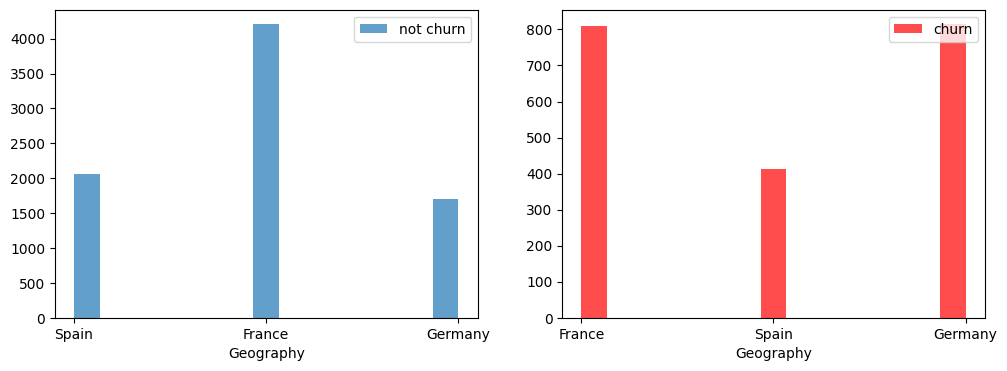

In [18]:
pyplot.figure(figsize=(12,4))

pyplot.subplot(1,2,1)
pyplot.xlabel("Geography")
pyplot.hist(not_churn["Geography"],bins=15,alpha=0.7, label="not churn")
pyplot.legend(loc="upper right")

pyplot.subplot(1,2,2)
pyplot.xlabel("Geography")
pyplot.hist(churn["Geography"],bins=15,alpha=0.7, label="churn", color="red")
pyplot.legend(loc="upper right")

pyplot.show()

# France is the most not churn
# Germany is the most churn

# Gender

In [19]:
not_churn.Gender.value_counts()

Gender
Male      4559
Female    3404
Name: count, dtype: int64

In [20]:
churn.Gender.value_counts()

Gender
Female    1139
Male       898
Name: count, dtype: int64

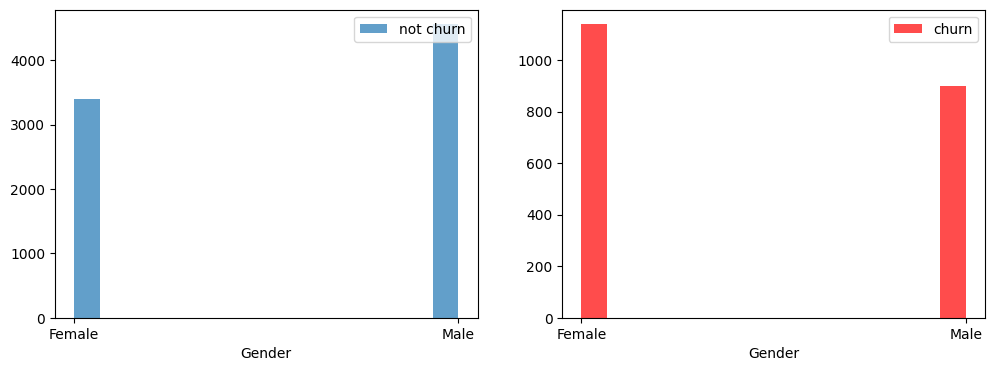

In [21]:
pyplot.figure(figsize=(12,4))

pyplot.subplot(1,2,1)
pyplot.xlabel("Gender")
pyplot.hist(not_churn["Gender"],bins=15,alpha=0.7, label="not churn")
pyplot.legend(loc="upper right")

pyplot.subplot(1,2,2)
pyplot.xlabel("Gender")
pyplot.hist(churn["Gender"],bins=15,alpha=0.7, label="churn", color="red")
pyplot.legend(loc="upper right")

pyplot.show()

# Age

In [22]:
not_churn["Age"].describe()

count    7963.000000
mean       37.408389
std        10.125363
min        18.000000
25%        31.000000
50%        36.000000
75%        41.000000
max        92.000000
Name: Age, dtype: float64

In [23]:
churn["Age"].describe()

count    2037.000000
mean       44.837997
std         9.761562
min        18.000000
25%        38.000000
50%        45.000000
75%        51.000000
max        84.000000
Name: Age, dtype: float64

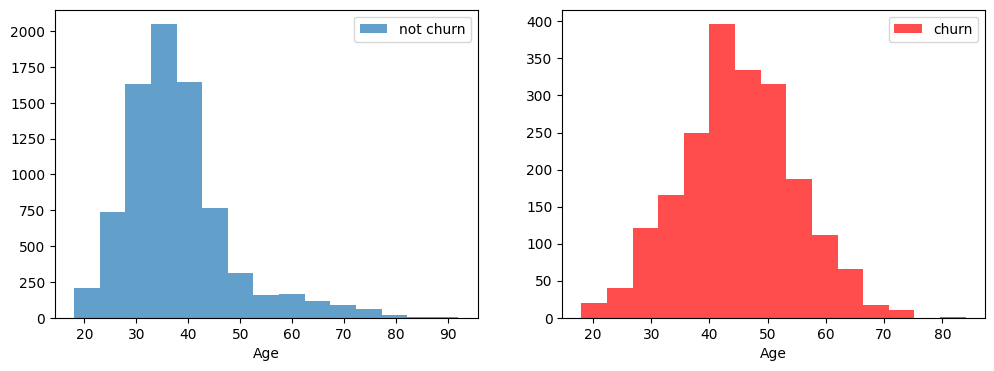

In [24]:
pyplot.figure(figsize=(12,4))

pyplot.subplot(1,2,1)
pyplot.xlabel("Age")
pyplot.hist(not_churn["Age"],bins=15,alpha=0.7, label="not churn")
pyplot.legend(loc="upper right")

pyplot.subplot(1,2,2)
pyplot.xlabel("Age")
pyplot.hist(churn["Age"],bins=15,alpha=0.7, label="churn", color="red")
pyplot.legend(loc="upper right")

pyplot.show()

# Tenure

In [25]:
not_churn["Tenure"].describe()

count    7963.000000
mean        5.033279
std         2.880658
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64

In [26]:
churn["Tenure"].describe()

count    2037.000000
mean        4.932744
std         2.936106
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Tenure, dtype: float64

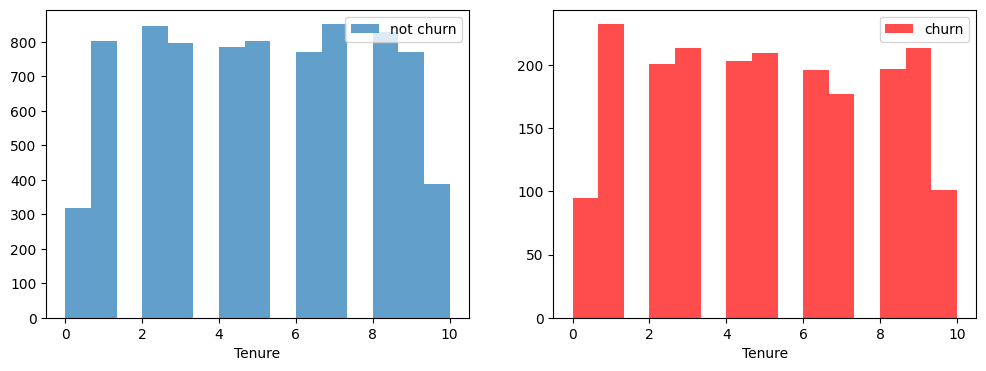

In [27]:
pyplot.figure(figsize=(12,4))

pyplot.subplot(1,2,1)
pyplot.xlabel("Tenure")
pyplot.hist(not_churn["Tenure"],bins=15,alpha=0.7, label="not churn")
pyplot.legend(loc="upper right")

pyplot.subplot(1,2,2)
pyplot.xlabel("Tenure")
pyplot.hist(churn["Tenure"],bins=15,alpha=0.7, label="churn", color="red")
pyplot.legend(loc="upper right")

pyplot.show()

# Balance

In [28]:
not_churn["Balance"].describe()

count      7963.000000
mean      72745.296779
std       62848.040701
min           0.000000
25%           0.000000
50%       92072.680000
75%      126410.280000
max      221532.800000
Name: Balance, dtype: float64

In [29]:
churn["Balance"].describe()

count      2037.000000
mean      91108.539337
std       58360.794816
min           0.000000
25%       38340.020000
50%      109349.290000
75%      131433.330000
max      250898.090000
Name: Balance, dtype: float64

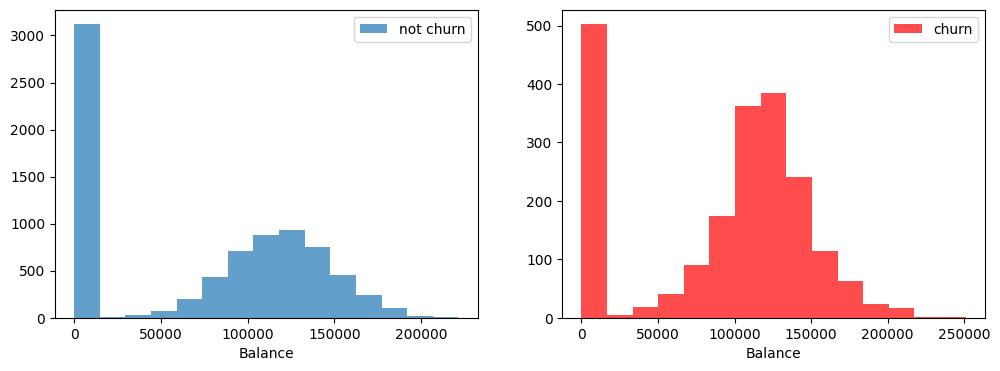

In [30]:
pyplot.figure(figsize=(12,4))

pyplot.subplot(1,2,1)
pyplot.xlabel("Balance")
pyplot.hist(not_churn["Balance"],bins=15,alpha=0.7, label="not churn")
pyplot.legend(loc="upper right")

pyplot.subplot(1,2,2)
pyplot.xlabel("Balance")
pyplot.hist(churn["Balance"],bins=15,alpha=0.7, label="churn", color="red")
pyplot.legend(loc="upper right")

pyplot.show()

# 	NumOfProducts

In [31]:
not_churn["NumOfProducts"].describe()

count    7963.000000
mean        1.544267
std         0.509536
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: NumOfProducts, dtype: float64

In [32]:
churn["NumOfProducts"].describe()

count    2037.000000
mean        1.475209
std         0.801521
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: NumOfProducts, dtype: float64

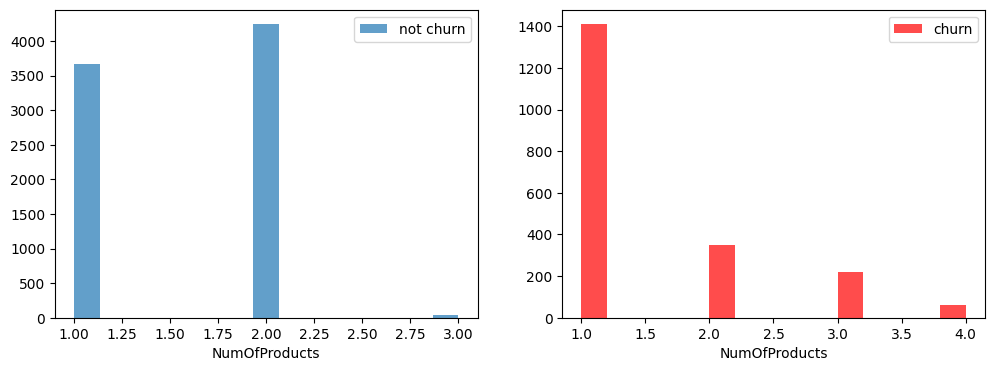

In [33]:
pyplot.figure(figsize=(12,4))

pyplot.subplot(1,2,1)
pyplot.xlabel("NumOfProducts")
pyplot.hist(not_churn["NumOfProducts"],bins=15,alpha=0.7, label="not churn")
pyplot.legend(loc="upper right")

pyplot.subplot(1,2,2)
pyplot.xlabel("NumOfProducts")
pyplot.hist(churn["NumOfProducts"],bins=15,alpha=0.7, label="churn", color="red")
pyplot.legend(loc="upper right")

pyplot.show()

# HasCrCard

In [34]:
not_churn["HasCrCard"].describe()

count    7963.000000
mean        0.707146
std         0.455101
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: HasCrCard, dtype: float64

In [35]:
churn["HasCrCard"].describe()

count    2037.000000
mean        0.699067
std         0.458776
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: HasCrCard, dtype: float64

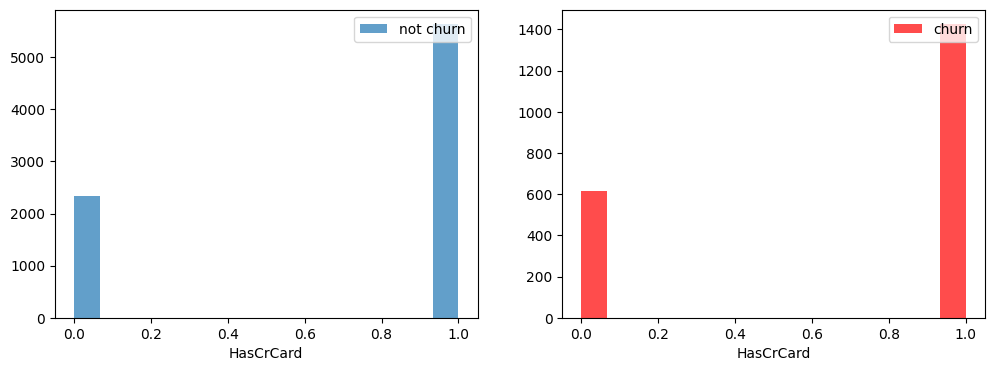

In [36]:
pyplot.figure(figsize=(12,4))

pyplot.subplot(1,2,1)
pyplot.xlabel("HasCrCard")
pyplot.hist(not_churn["HasCrCard"],bins=15,alpha=0.7, label="not churn")
pyplot.legend(loc="upper right")

pyplot.subplot(1,2,2)
pyplot.xlabel("HasCrCard")
pyplot.hist(churn["HasCrCard"],bins=15,alpha=0.7, label="churn", color="red")
pyplot.legend(loc="upper right")

pyplot.show()

# IsActiveMember

In [37]:
not_churn["IsActiveMember"].describe()

count    7963.000000
mean        0.554565
std         0.497045
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: IsActiveMember, dtype: float64

In [38]:
churn["IsActiveMember"].describe()

count    2037.000000
mean        0.360825
std         0.480358
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: IsActiveMember, dtype: float64

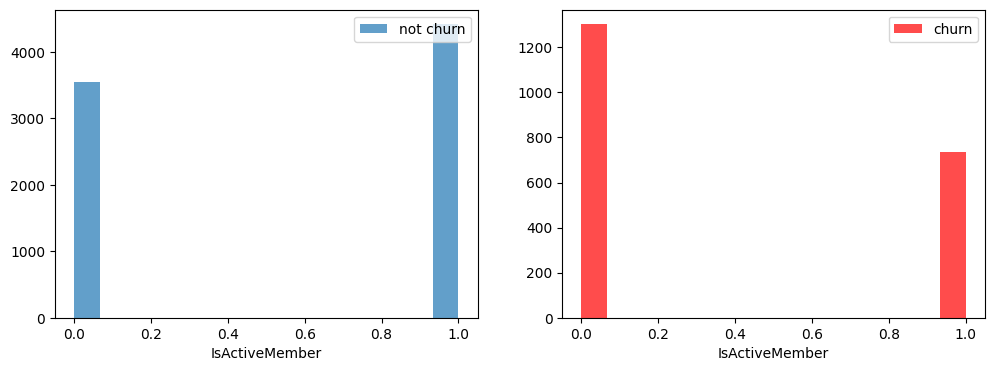

In [39]:
pyplot.figure(figsize=(12,4))

pyplot.subplot(1,2,1)
pyplot.xlabel("IsActiveMember")
pyplot.hist(not_churn["IsActiveMember"],bins=15,alpha=0.7, label="not churn")
pyplot.legend(loc="upper right")

pyplot.subplot(1,2,2)
pyplot.xlabel("IsActiveMember")
pyplot.hist(churn["IsActiveMember"],bins=15,alpha=0.7, label="churn", color="red")
pyplot.legend(loc="upper right")

pyplot.show()

# EstimatedSalary

In [40]:
not_churn["EstimatedSalary"].describe()

count      7963.000000
mean      99738.391772
std       57405.586966
min          90.070000
25%       50783.490000
50%       99645.040000
75%      148609.955000
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [41]:
churn["EstimatedSalary"].describe()

count      2037.000000
mean     101465.677531
std       57912.418071
min          11.580000
25%       51907.720000
50%      102460.840000
75%      152422.910000
max      199808.100000
Name: EstimatedSalary, dtype: float64

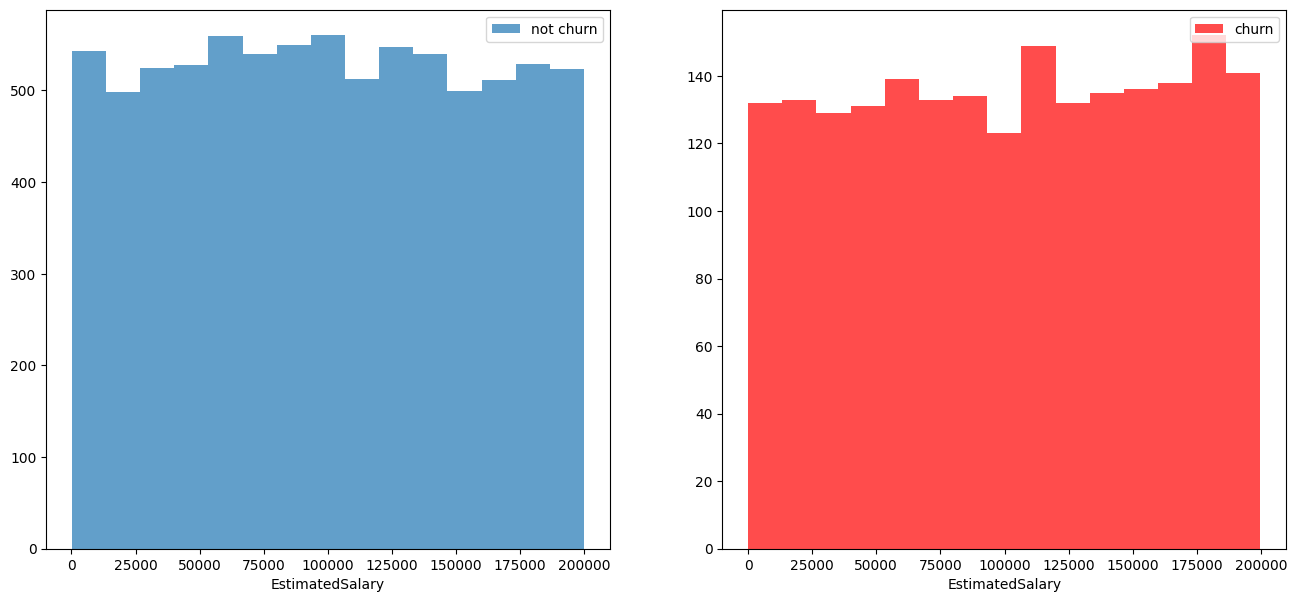

In [42]:
pyplot.figure(figsize=(16,7))

pyplot.subplot(1,2,1)
pyplot.xlabel("EstimatedSalary")
pyplot.hist(not_churn["EstimatedSalary"],bins=15,alpha=0.7, label="not churn")
pyplot.legend(loc="upper right")

pyplot.subplot(1,2,2)
pyplot.xlabel("EstimatedSalary")
pyplot.hist(churn["EstimatedSalary"],bins=15,alpha=0.7, label="churn", color="red")
pyplot.legend(loc="upper right")

pyplot.show()

##Exited

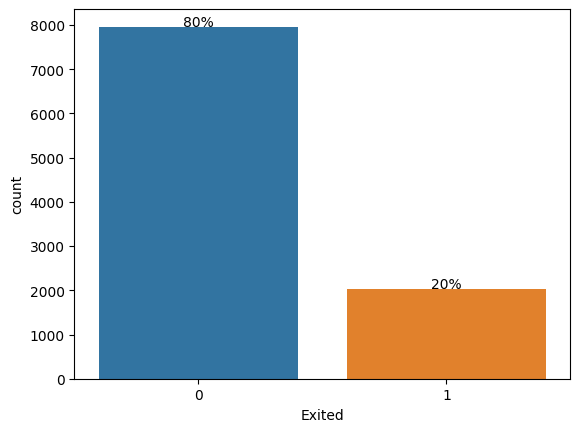

In [43]:
total=float(len(data))
ax=sns.countplot(x="Exited",data=data)
for i in ax.patches:
    height=i.get_height()
    ax.text(i.get_x()+i.get_width()/2.,height + 3
           ,'{0:.0%}'.format(height/total),ha="center")

## crosstab charts

<Axes: xlabel='Geography'>

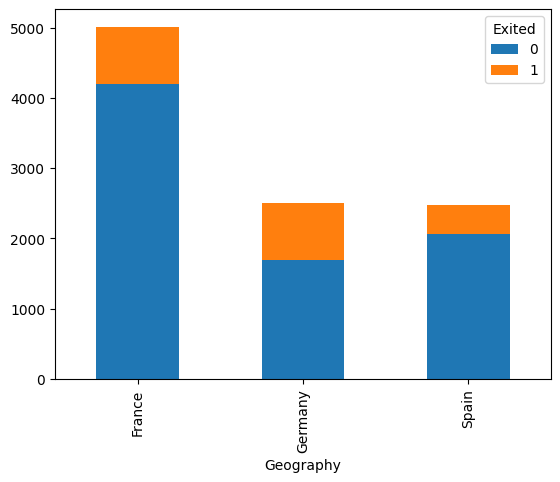

In [44]:
crosstab_01 = pd.crosstab(data.Geography ,data.Exited )
crosstab_01.plot(kind = "bar" , stacked = True)

<Axes: xlabel='Gender'>

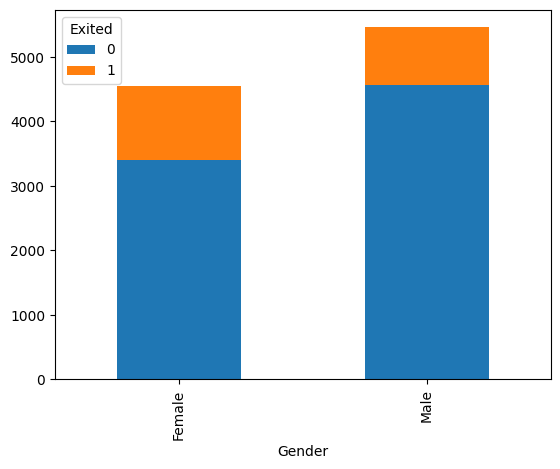

In [45]:
crosstab_02 = pd.crosstab(data.Gender ,data.Exited )
crosstab_02.plot(kind = "bar" , stacked = True)

<Figure size 2000x1500 with 0 Axes>

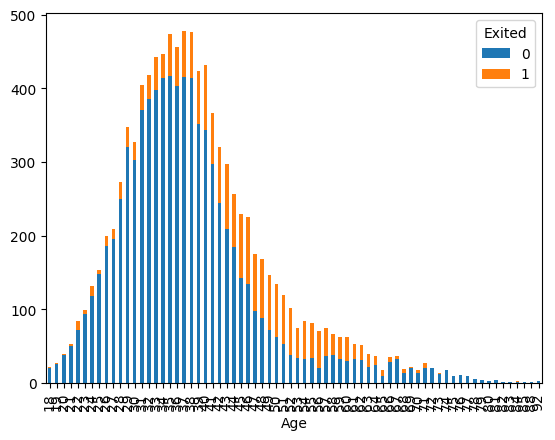

In [46]:
pyplot.figure(figsize=(20,15))
crosstab_03 = pd.crosstab(data.Age ,data.Exited )
crosstab_03.plot(kind = "bar" , stacked = True)
pyplot.show()

<Axes: xlabel='IsActiveMember'>

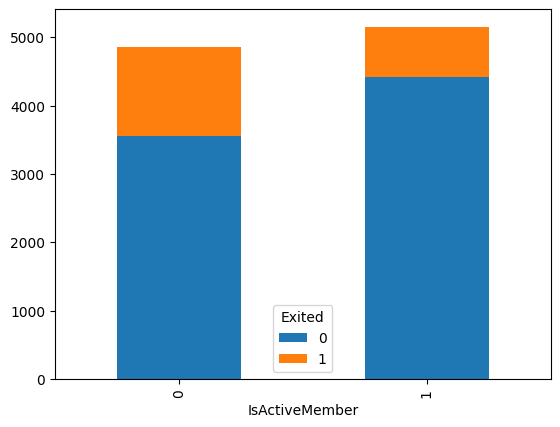

In [47]:

crosstab_04 = pd.crosstab(data.IsActiveMember ,data.Exited )
crosstab_04.plot(kind = "bar" , stacked = True)

## Correlation

In [48]:
data["Geography"].replace({'France': 2, 'Spain': 3, 'Germany': 4}, inplace = True)
data["Gender"].replace({'Female': 2, 'Male': 3}, inplace = True)

<Axes: >

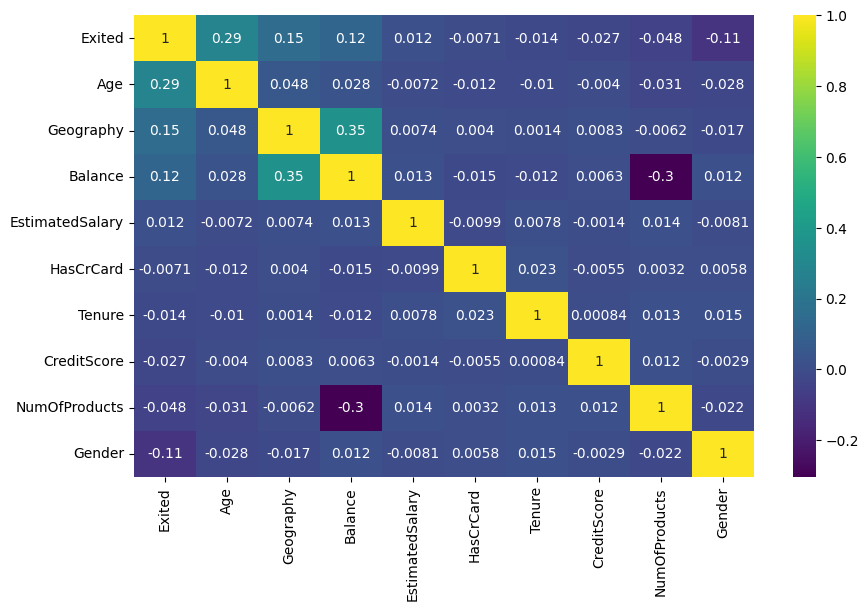

In [49]:
cols = data.corr().nlargest(10, 'Exited')['Exited'].index
cm = data[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap="viridis")

# Data Preprocessing

In [50]:
# find missing data
data.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

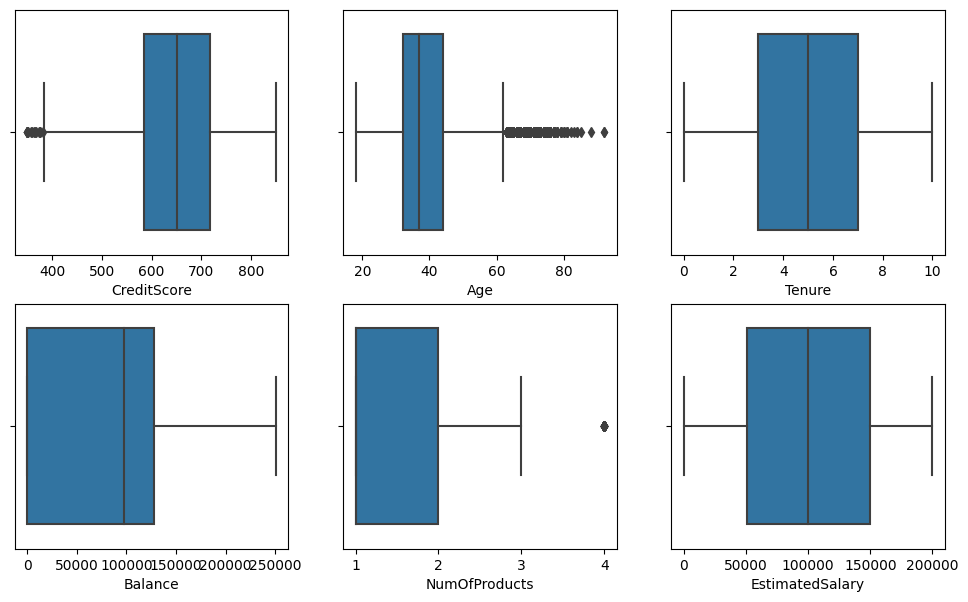

In [51]:
col = ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts' ,'EstimatedSalary']
i = 0
while i < 6:
    fig = plt.figure(figsize = [12,7])
    plt.subplot(2,3,1)
    sns.boxplot(x = col[i], data = data)
    i += 1
    plt.subplot(2,3,2)
    sns.boxplot(x = col[i], data = data)
    i += 1
    plt.subplot(2,3,3)
    sns.boxplot(x = col[i], data = data)
    i += 1
    plt.subplot(2,3,4)
    sns.boxplot(x = col[i], data = data)
    i += 1
    plt.subplot(2,3,5)
    sns.boxplot(x = col[i], data = data)
    i += 1
    plt.subplot(2,3,6)
    sns.boxplot(x = col[i], data = data)
    i += 1
    plt.show()

In [52]:
data["CreditScore"]=data["CreditScore"].clip(lower=data["CreditScore"].quantile(0.02),upper=data["CreditScore"].quantile(0.98))
data["Age"]=data["Age"].clip(lower=data["Age"].quantile(0.05),upper=data["Age"].quantile(0.95))
data["NumOfProducts"]=data["NumOfProducts"].clip(lower=data["NumOfProducts"].quantile(0.03),upper=data["NumOfProducts"].quantile(0.97))

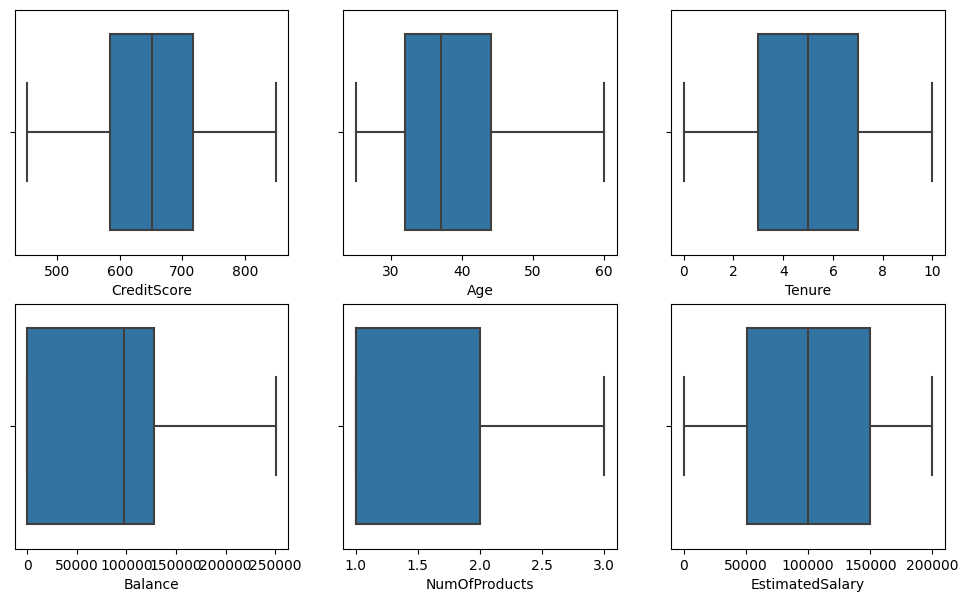

In [53]:
col = ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts' ,'EstimatedSalary']
i = 0
while i < 6:
    fig = plt.figure(figsize = [12,7])
    plt.subplot(2,3,1)
    sns.boxplot(x = col[i], data = data)
    i += 1
    plt.subplot(2,3,2)
    sns.boxplot(x = col[i], data = data)
    i += 1
    plt.subplot(2,3,3)
    sns.boxplot(x = col[i], data = data)
    i += 1
    plt.subplot(2,3,4)
    sns.boxplot(x = col[i], data = data)
    i += 1
    plt.subplot(2,3,5)
    sns.boxplot(x = col[i], data = data)
    i += 1
    plt.subplot(2,3,6)
    sns.boxplot(x = col[i], data = data)
    i += 1
    plt.show()

# Modeling

In [54]:
x = data.drop("Exited",axis=1)
y = data["Exited"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

## LogisticRegression

In [55]:
model=LogisticRegression(solver='liblinear',C=10.0, random_state=0)
KFold=KFold(10)
results=cross_val_score(model,x,y.ravel(),cv=KFold)
results

array([0.789, 0.788, 0.785, 0.786, 0.797, 0.798, 0.805, 0.798, 0.788,
       0.811])

In [56]:
model.fit(x_train,y_train.ravel())

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [57]:
y_pred = model.predict(x_test)

In [58]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7955


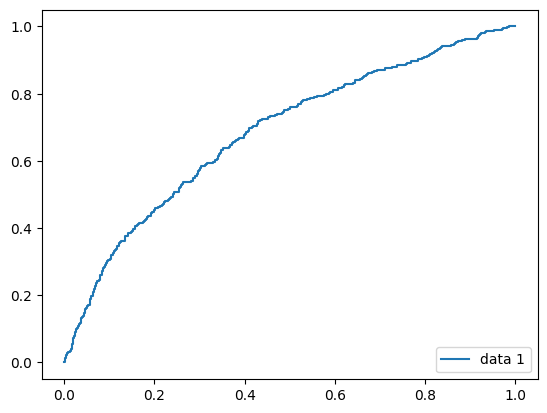

In [59]:
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
plt.plot(fpr,tpr,label="data 1")
plt.legend(loc=4)
plt.show()

In [60]:
model.predict_proba(x)

array([[0.79024785, 0.20975215],
       [0.7408855 , 0.2591145 ],
       [0.55113557, 0.44886443],
       ...,
       [0.89055   , 0.10945   ],
       [0.87245981, 0.12754019],
       [0.9269603 , 0.0730397 ]])

In [61]:
model.score(x, y)

0.7952

In [62]:
confusion_matrix(y, model.predict(x))

array([[7769,  194],
       [1854,  183]])

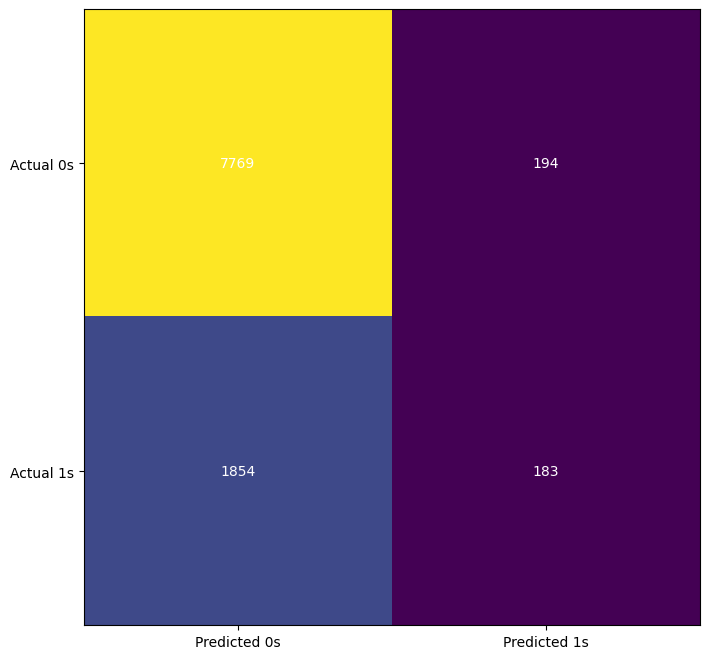

In [63]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [64]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       0.81      0.98      0.88      7963
           1       0.49      0.09      0.15      2037

    accuracy                           0.80     10000
   macro avg       0.65      0.53      0.52     10000
weighted avg       0.74      0.80      0.73     10000


## KNN

In [65]:
k=20

acc=np.zeros((k))

for i in range(1, k+1):
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train,y_train.ravel())
    y_pred=clf.predict(x_test)
    acc[i-1]=metrics.accuracy_score(y_test,y_pred)
acc

array([0.683 , 0.7735, 0.731 , 0.7855, 0.7635, 0.7925, 0.779 , 0.794 ,
       0.7835, 0.7935, 0.79  , 0.794 , 0.7885, 0.794 , 0.7925, 0.797 ,
       0.7945, 0.7955, 0.794 , 0.7955])

In [66]:
print(np.max(acc))
print(np.min(acc))

0.797
0.683


In [67]:
k=17

clf=KNeighborsClassifier(k)

clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [68]:
print("Accuracy is :",metrics.accuracy_score(y_test,y_pred))

Accuracy is : 0.7945


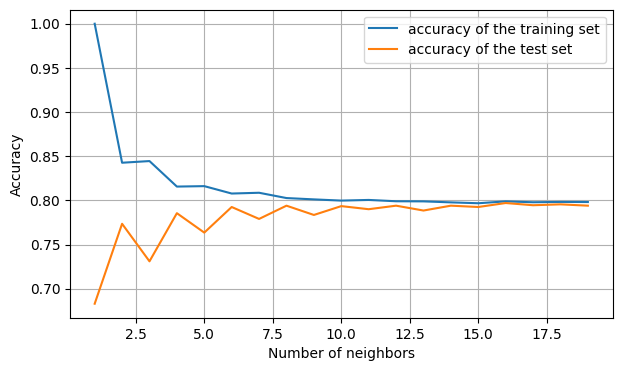

In [69]:
training_acc=[]
test_acc=[]

neighbors_setting=range(1,20)

for n_neighbors in neighbors_setting:
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train,y_train.ravel())
    training_acc.append(knn.score(x_train,y_train))
    test_acc.append(knn.score(x_test,y_test))

plt.figure(figsize=(7,4),dpi=100)

plt.plot(neighbors_setting,training_acc,label="accuracy of the training set")

plt.plot(neighbors_setting,test_acc,label="accuracy of the test set")

plt.xlabel("Number of neighbors")

plt.ylabel("Accuracy")

plt.grid()

plt.legend()

plt.show()

In [70]:
# Grid search
parameters={"n_neighbors":range(1,50)}

grid_knn=GridSearchCV(estimator=knn,param_grid=parameters,scoring="accuracy",cv=5,verbose=1,n_jobs=-1)

grid_knn.fit(x_train,y_train.ravel())

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=19), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 50)}, scoring='accuracy',
             verbose=1)

In [71]:
grid_knn.best_params_

{'n_neighbors': 36}

In [72]:
k=36

clf=KNeighborsClassifier(k)

clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [73]:
print("Accuracy is :",metrics.accuracy_score(y_test,y_pred))

Accuracy is : 0.7965


## Decision Tree

In [74]:
clf=DecisionTreeClassifier(max_depth=5)

clf=clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [75]:
print("Accuracy :",metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.857


In [76]:
text_representation=tree.export_text(clf)
print(text_representation)

|--- feature_3 <= 42.50
|   |--- feature_6 <= 2.50
|   |   |--- feature_6 <= 1.50
|   |   |   |--- feature_1 <= 3.50
|   |   |   |   |--- feature_5 <= 75371.29
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  75371.29
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  3.50
|   |   |   |   |--- feature_3 <= 33.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_3 >  33.50
|   |   |   |   |   |--- class: 0
|   |   |--- feature_6 >  1.50
|   |   |   |--- feature_5 <= 69409.79
|   |   |   |   |--- feature_2 <= 2.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  2.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_5 >  69409.79
|   |   |   |   |--- feature_5 <= 205892.86
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  205892.86
|   |   |   |   |   |--- class: 1
|   |--- feature_6 >  2.50
|   |   |--- feature_5 <= 23194.08
|   |   |   |--- feature_9 <= 135675.30
|   |   |   |   |--- feature_3 <=

In [77]:
clf=DecisionTreeClassifier(criterion="entropy",max_depth=5)

clf=clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [78]:
print("Accuracy :",metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.857


## RandomForest

In [79]:
clf=RandomForestClassifier(n_estimators=151,max_depth=7)

clf=clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [80]:
print("Accuracy :",metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.871


## SVM

In [81]:
clf=SVC()

In [82]:
clf.fit(x_train,y_train)

SVC()

In [83]:
y_pred=clf.predict(x_test)

In [84]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
print("Accuracy is :",metrics.accuracy_score(y_test,y_pred))

Accuracy is : 0.7975


## Naive Bayes

In [86]:
clf = GaussianNB()
clf.fit(x_train,y_train.ravel())
y_pred = clf.predict(x_test)

In [87]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7885


##XG Boost

In [88]:
model_XG = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=3,
    gamma=0,
    colsample_bytree=0.5,
    subsample=0.5,
    learning_rate = 0.01,
    reg_lambda=1,
    reg_alpha=0,
    scale_pos_weight=1,
    objective='binary:logistic',
    eta = 0.3,
    eval_metric = 'logloss',
    )

In [89]:
# Fit the model to the training data
model_XG.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eta=0.3, eval_metric='logloss',
              feature_types=None, gamma=0, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [90]:
# Make predictions on the test data
y_pred = model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7955


##LightGBM

In [91]:
lgbm_classifier = lgb.LGBMClassifier(
    objective = "binary",
    boosting_type='dart',
    n_estimators=100,
    metric="binary_logloss,auc",
    learning_rate = 0.03,
    num_leaves = 31,
    tree_learner = "data",
    feature_fraction = 0.8,
    bagging_freq = 5,
    bagging_fraction = 0.8,
    min_data_in_leaf = 50,
    min_sum_hessian_in_leaf = 5.0,
    force_col_wise= True
    )


In [92]:
# Fit the model on the training data
lgbm_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = lgbm_classifier.predict(x_test)
# You can also access feature importances
feature_importances = lgbm_classifier.feature_importances_
print("Feature Importances:", feature_importances)

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5.0, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5.0
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
Feature Importances: [228 277 171 604 142 670 313  20 210 365]


In [93]:
# Evaluate the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.87
